# Exercise 02: Multi-class Classification 
In this exercise, you will train a deep model on the CIFAR10 from the scratch using PyTorch. The following tasks should be done:
- Task 1: per batch training/testing
- Task 2: Instance inference and visualization

### Basic Imports

In [239]:
import os
import time
import os.path as osp

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms
import torchvision

import matplotlib.pyplot as plt
from PIL import Image

### Hyperparameters

In [240]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 30
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-1
MOMENTUM = 0.9
STEP=5
GAMMA=0.5


### Device

In [241]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


### Dataset


In [242]:
# cifar10 transform
transform_cifar10_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_cifar10_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_set = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform_cifar10_train)
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=transform_cifar10_test)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Files already downloaded and verified
Files already downloaded and verified


### Model

In [243]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, 3)  
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 8, 3)  
        self.fc1 = nn.Linear(8 * 6 * 6, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 8 * 6 * 6)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [244]:
model = ConvNet()
model.to(device)

ConvNet(
  (conv1): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=288, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)

### Optimizer

In [245]:
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
#lr=LEARNING_RATE就是step_size

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)

### Task 1: per batch training/testing
---

Please denfine two function named ``train_batch`` and ``test_batch``. These functions are essential for training and evaluating machine learning models using batched data from dataloaders.

**To do**: 
1. Define the loss function i.e [nn.CrossEntropyLoss()](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).
2. Take the image as the input and generate the output using the pre-defined SimpleNet.
3. Calculate the loss between the output and the corresponding label using the loss function.

In [246]:
##################### Write your answer here ##################
# Define the loss function
#criterion = 
###############################################################

# Example of target with class indices
criterion = nn.CrossEntropyLoss()
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.empty(3, dtype=torch.long).random_(5)
# output = loss(input, target)
# output.backward()

# # Example of target with class probabilities
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.randn(3, 5).softmax(dim=1)
# output = loss(input, target)
# output.backward()

In [247]:
def train_batch(model, image, target):
    """
    Perform one training batch iteration.

    Args:
        model (torch.nn.Module): The machine learning model to train.
        image (torch.Tensor): Batch of input data (images).
        target (torch.Tensor): Batch of target labels.

    Returns:
        torch.Tensor: Model output (predictions) for the batch.
        torch.Tensor: Loss value calculated by the defined loss function loss_fn().
    """
    
    ##################### Write your answer here ##################
    
    ###############################################################
    
    ##################### Write your answer here ##################
    output = model(image)
    loss = criterion(output, target)
    ###############################################################

    return output, loss

In [248]:
def test_batch(model, image, target):
    """
    Perform one testing batch iteration.

    Args:
        model (torch.nn.Module): The machine learning model to evaluate.
        image (torch.Tensor): Batch of input data (images).
        target (torch.Tensor): Batch of target labels.

    Returns:
        torch.Tensor: Model output (predictions) for the batch.
        torch.Tensor: Loss value calculated for the batch.
    """
    
    ##################### Write your answer here ##################
    
    ###############################################################
    
    ##################### Write your answer here ##################
    output = model(image)
    loss = criterion(output, target)
    ###############################################################

    return output, loss

### Model Training

In [249]:
training_loss = []
training_acc = []
testing_loss = []
testing_acc = []

for epoch in range(NUM_EPOCHS):
    model.train()
    torch.cuda.empty_cache()

    ##########################
    ### Training
    ##########################

    running_cls_loss = 0.0
    running_cls_corrects = 0

    for batch_idx, (image, target) in enumerate(train_dataloader):

        image = image.to(device)
        target = target.to(device)

        # train model
        outputs, loss = train_batch(model, image, target)
        _, preds = torch.max(outputs, 1)

        
        loss_data = loss.data.item()
        if np.isnan(loss_data):
            raise ValueError('loss is nan while training')
        running_cls_loss += loss.item()
        running_cls_corrects += torch.sum(preds == target.data)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    epoch_loss = running_cls_loss / len(train_set)
    epoch_acc = running_cls_corrects.double() / len(train_set)

    print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    training_loss.append(epoch_loss)
    training_acc.append(epoch_acc.cpu().detach().numpy())

    # change learning rate
    scheduler.step()


    ##########################
    ### Testing
    ##########################
    # # eval model during training or in the last epoch
    if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
        print('Begin test......')
        model.eval()
    
        val_loss = 0.0
        val_corrects = 0

        for batch_idx, (image, target) in enumerate(test_dataloader):

            image = image.to(device)
            target = target.to(device)

            # test model
            outputs, loss = test_batch(model, image, target)
            _, preds = torch.max(outputs, 1)
            
            #将浮点型的loss转化为tensor
            loss = torch.tensor(loss)
            #########################
            
            val_loss += loss.item()
            val_corrects += torch.sum(preds == target.data)

        val_loss = val_loss / len(test_set)
        val_acc = val_corrects.double() / len(test_set)
        print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
        testing_loss.append(val_loss)
        testing_acc.append(val_acc.cpu().detach().numpy())

        # save the model in last epoch
        if (epoch +1) == NUM_EPOCHS:
            
            state = {
            'state_dict': model.state_dict(),
            'acc': epoch_acc,
            'epoch': (epoch+1),
            }

            # check the dir
            if not os.path.exists(SAVE_DIR):
                os.makedirs(SAVE_DIR)

            # save the state
            torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))

Epoch: 1/30 Train Loss: 0.0149 Acc: 0.2960
Begin test......


/tmp/ipykernel_88/1637500696.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = torch.tensor(loss)


Test Loss: 0.0134 Acc: 0.3850
Epoch: 2/30 Train Loss: 0.0138 Acc: 0.3466
Begin test......
Test Loss: 0.0131 Acc: 0.3915
Epoch: 3/30 Train Loss: 0.0137 Acc: 0.3485
Begin test......
Test Loss: 0.0128 Acc: 0.3998
Epoch: 4/30 Train Loss: 0.0135 Acc: 0.3601
Begin test......
Test Loss: 0.0130 Acc: 0.3926
Epoch: 5/30 Train Loss: 0.0136 Acc: 0.3567
Begin test......
Test Loss: 0.0126 Acc: 0.4118
Epoch: 6/30 Train Loss: 0.0127 Acc: 0.4004
Begin test......
Test Loss: 0.0118 Acc: 0.4507
Epoch: 7/30 Train Loss: 0.0125 Acc: 0.4141
Begin test......
Test Loss: 0.0118 Acc: 0.4441
Epoch: 8/30 Train Loss: 0.0124 Acc: 0.4214
Begin test......
Test Loss: 0.0116 Acc: 0.4594
Epoch: 9/30 Train Loss: 0.0123 Acc: 0.4224
Begin test......
Test Loss: 0.0120 Acc: 0.4530
Epoch: 10/30 Train Loss: 0.0122 Acc: 0.4289
Begin test......
Test Loss: 0.0117 Acc: 0.4561
Epoch: 11/30 Train Loss: 0.0116 Acc: 0.4631
Begin test......
Test Loss: 0.0107 Acc: 0.5045
Epoch: 12/30 Train Loss: 0.0115 Acc: 0.4657
Begin test......
Test Lo

### Task 2: Instance inference
---
The task is to visualizes an image along with model prediction and class probabilities.

**To do**: 
1. Calculate the prediction and the probabilities for each class.
         

In [250]:
inputs, classes = next(iter(test_dataloader))
input = inputs[0]
input
# print(input)
# image = input.numpy().transpose((1, 2, 0))
# plt.imshow(image)

tensor([[[ 0.6338,  0.6531,  0.7694,  ...,  0.2267,  0.0134, -0.1804],
         [ 0.5174,  0.4981,  0.6531,  ...,  0.2073, -0.0060, -0.1223],
         [ 0.4981,  0.4981,  0.6338,  ...,  0.2654,  0.0910, -0.1029],
         ...,
         [-1.1109, -1.6149, -1.8281,  ..., -1.6924, -2.1771, -1.6537],
         [-1.2466, -1.4792, -1.7506,  ..., -1.9251, -1.8669, -2.0414],
         [-1.3823, -1.3435, -1.5567,  ..., -1.9638, -1.7700, -2.0220]],

        [[-0.2156, -0.2352, -0.1369,  ..., -0.5499, -0.6286, -0.7466],
         [-0.2156, -0.2549, -0.1762,  ..., -0.5499, -0.6286, -0.6876],
         [-0.2549, -0.2746, -0.2352,  ..., -0.4909, -0.5499, -0.6679],
         ...,
         [ 0.0204, -0.4516, -0.6876,  ..., -0.5106, -1.1596, -0.7466],
         [-0.1369, -0.4122, -0.7466,  ..., -0.8056, -0.8056, -1.1596],
         [-0.3139, -0.3532, -0.6679,  ..., -0.9039, -0.7662, -1.1006]],

        [[-1.2654, -1.3044, -1.2264,  ..., -1.5190, -1.5190, -1.5776],
         [-1.2264, -1.4410, -1.3434,  ..., -1

In [251]:
##################### Write your answer here ##################
# input: image, model
# outputs: predict_label, probabilities
# predict_label is the index (or label) of the class with the highest probability from the probabilities.
###############################################################
input = input.to(device)
probabilities = torch.nn.functional.softmax(model(input))
print(probabilities)
predict_label = torch.argmax(probabilities)
print(predict_label)
#test:probabilities是一个二维tensor
probabilities[0][1]

tensor([[0.0169, 0.0118, 0.0341, 0.3742, 0.0337, 0.2953, 0.0411, 0.0714, 0.0923,
         0.0294]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor(3, device='cuda:0')


/tmp/ipykernel_88/3395119992.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probabilities = torch.nn.functional.softmax(model(input))


tensor(0.0118, device='cuda:0', grad_fn=<SelectBackward0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


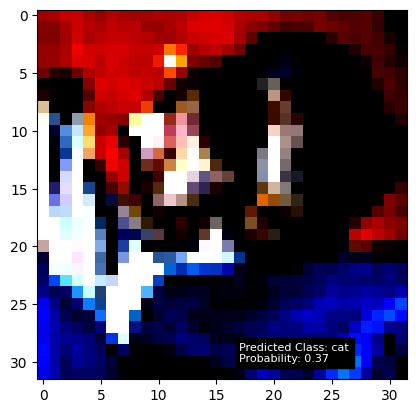

Print probabilities for each class:
airplane: 0.0169
automobile: 0.0118
bird: 0.0341
cat: 0.3742
deer: 0.0337
dog: 0.2953
frog: 0.0411
horse: 0.0714
ship: 0.0923
truck: 0.0294


In [252]:
predicted_class = class_names[predict_label.item()]
predicted_probability = probabilities[0][predict_label].item()
image = input.cpu().numpy().transpose((1, 2, 0))
plt.imshow(image)
plt.text(17, 30, f'Predicted Class: {predicted_class}\nProbability: {predicted_probability:.2f}', 
            color='white', backgroundcolor='black', fontsize=8)
plt.show()

# Print probabilities for each class
print('Print probabilities for each class:')
for i in range(len(class_names)):
    print(f'{class_names[i]}: {probabilities[0][i].item():.4f}')